In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.datasets import load_diabetes
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import xgboost as xgb
import joblib



import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv(r"C:\Users\ateso\Desktop\Diamonds\Data\train.csv")

df.head()



,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.90,Very Good,H,VS2,62.6,57.0,6.11,6.09,3.82,4662
1,1,0.33,Premium,H,VS1,61.9,58.0,4.45,4.43,2.75,743
2,2,1.20,Ideal,H,VS1,61.1,58.0,6.84,6.88,4.19,8039
3,3,1.64,Very Good,J,SI1,62.6,59.0,7.45,7.51,4.68,7739
4,4,1.51,Very Good,I,SI2,60.6,60.2,7.32,7.37,4.45,7441


In [4]:
df.shape

(40455, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [6]:
df = df.drop(columns=["id"])
df = df.reset_index(drop=True)

df.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.90,Very Good,H,VS2,62.6,57.0,6.11,6.09,3.82,4662
1,0.33,Premium,H,VS1,61.9,58.0,4.45,4.43,2.75,743
2,1.20,Ideal,H,VS1,61.1,58.0,6.84,6.88,4.19,8039
3,1.64,Very Good,J,SI1,62.6,59.0,7.45,7.51,4.68,7739
4,1.51,Very Good,I,SI2,60.6,60.2,7.32,7.37,4.45,7441


In [7]:
df.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.800535,61.749759,57.456757,5.736805,5.739206,3.542314,3952.091212
std,0.475428,1.437254,2.230407,1.124044,1.123658,0.710253,4002.061273
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000,956.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2416.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5352.000000
max,5.010000,79.000000,79.000000,10.740000,31.800000,31.800000,18823.000000


In [8]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(40439, 10)

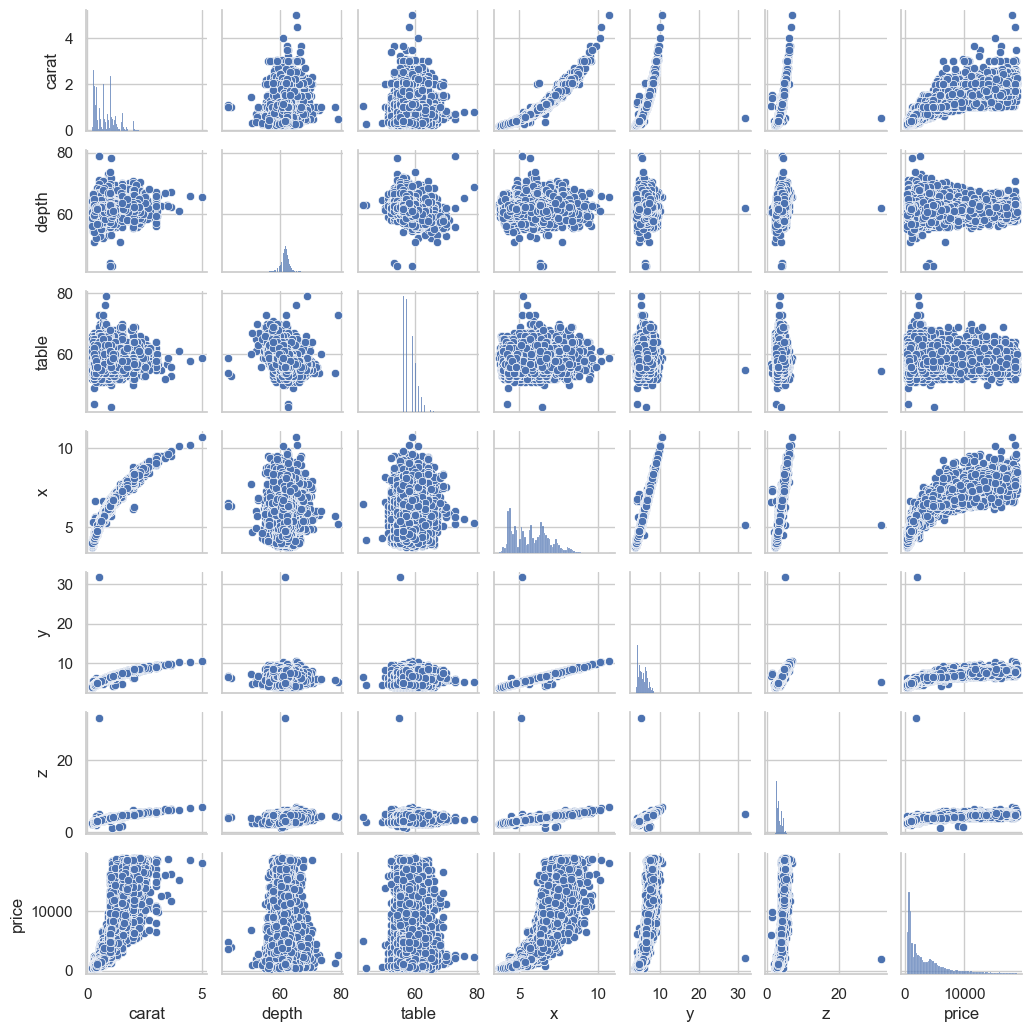

'\nBIG Outliers in the data : carat, depth, price, y, z.\n\n'

In [9]:
sns.pairplot(df, height=1.5)
plt.show()
"""
BIG Outliers in the data : carat, depth, price, y, z.

"""


Text(0.5, 1.0, 'Price vs. Y')

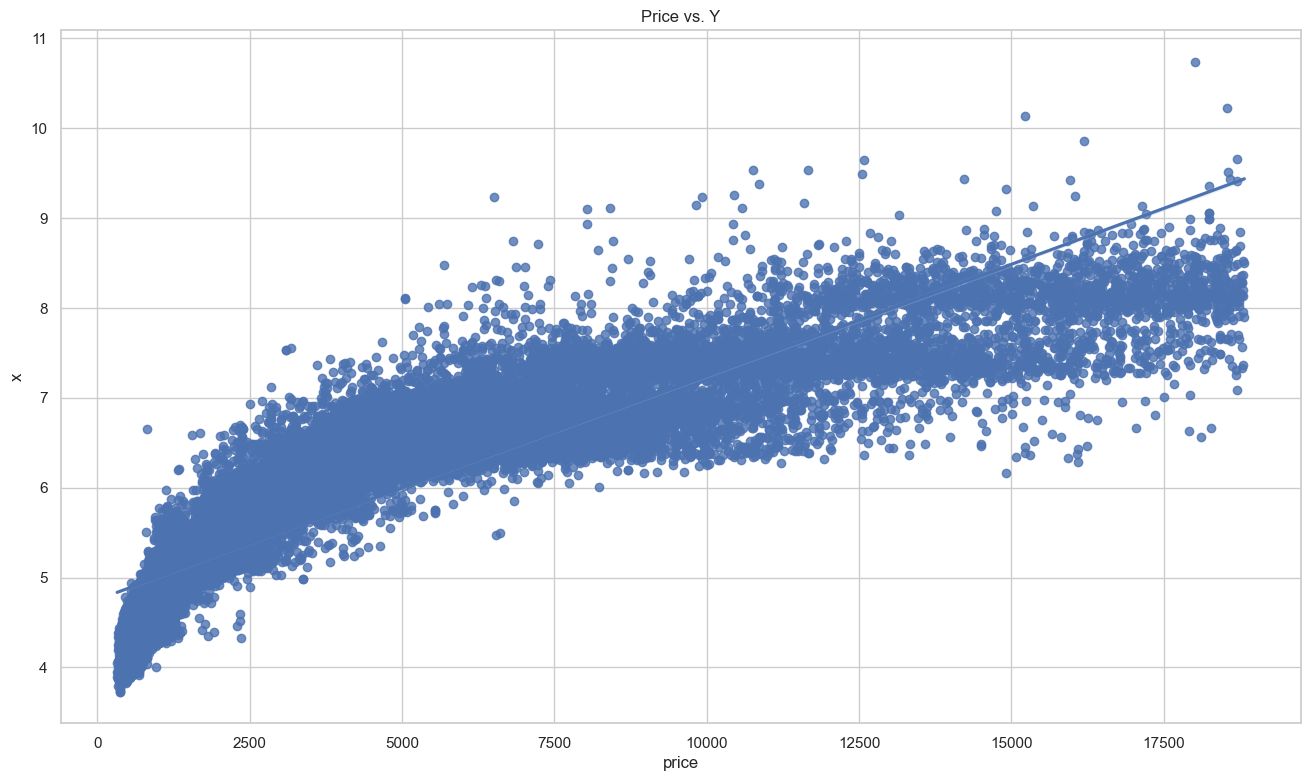

In [11]:
sns.regplot(x="price", y="x", data=df)
plt.title("Price vs. Y")

Text(0.5, 1.0, 'Price vs. Y')

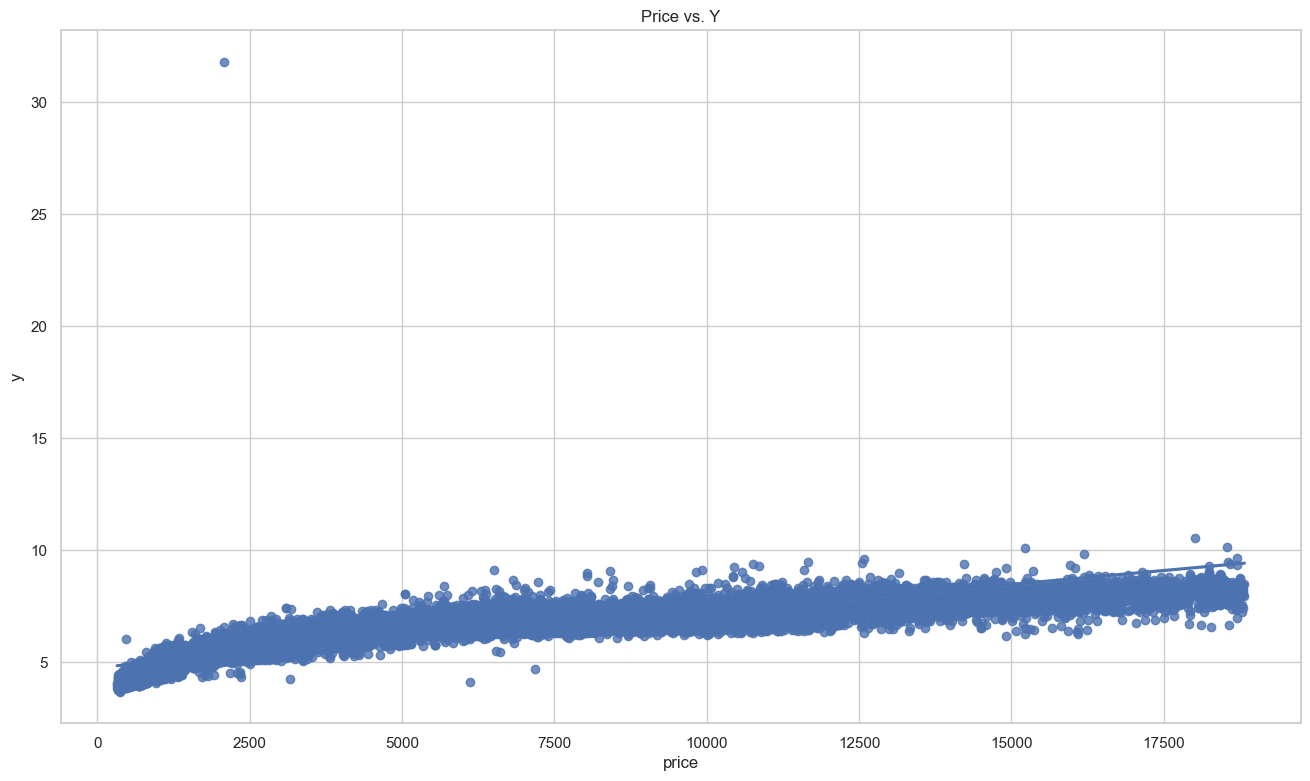

In [12]:
sns.regplot(x="price", y="y", data=df)
plt.title("Price vs. Y")

Text(0.5, 1.0, 'Price vs. Z')

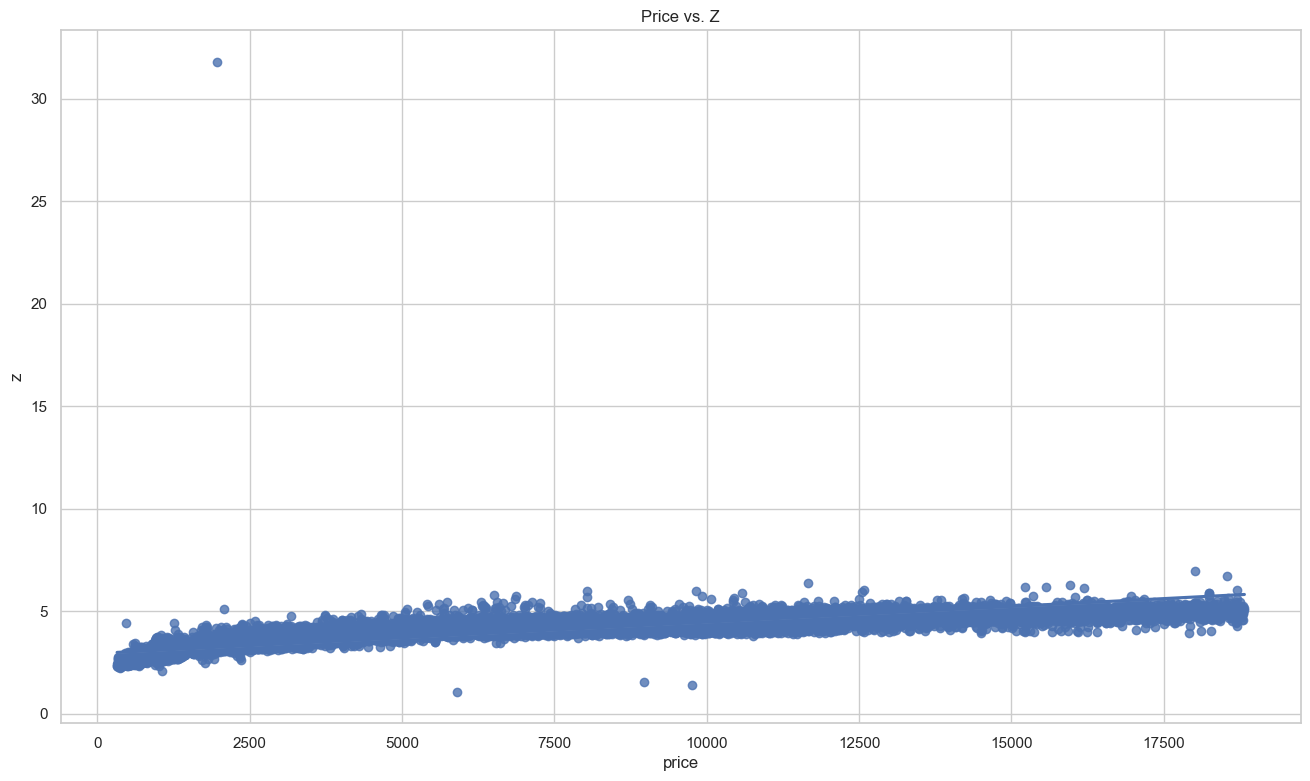

In [13]:
sns.regplot(x="price", y="z", data=df)
plt.title("Price vs. Z")

Text(0.5, 1.0, 'Price vs. Depth')

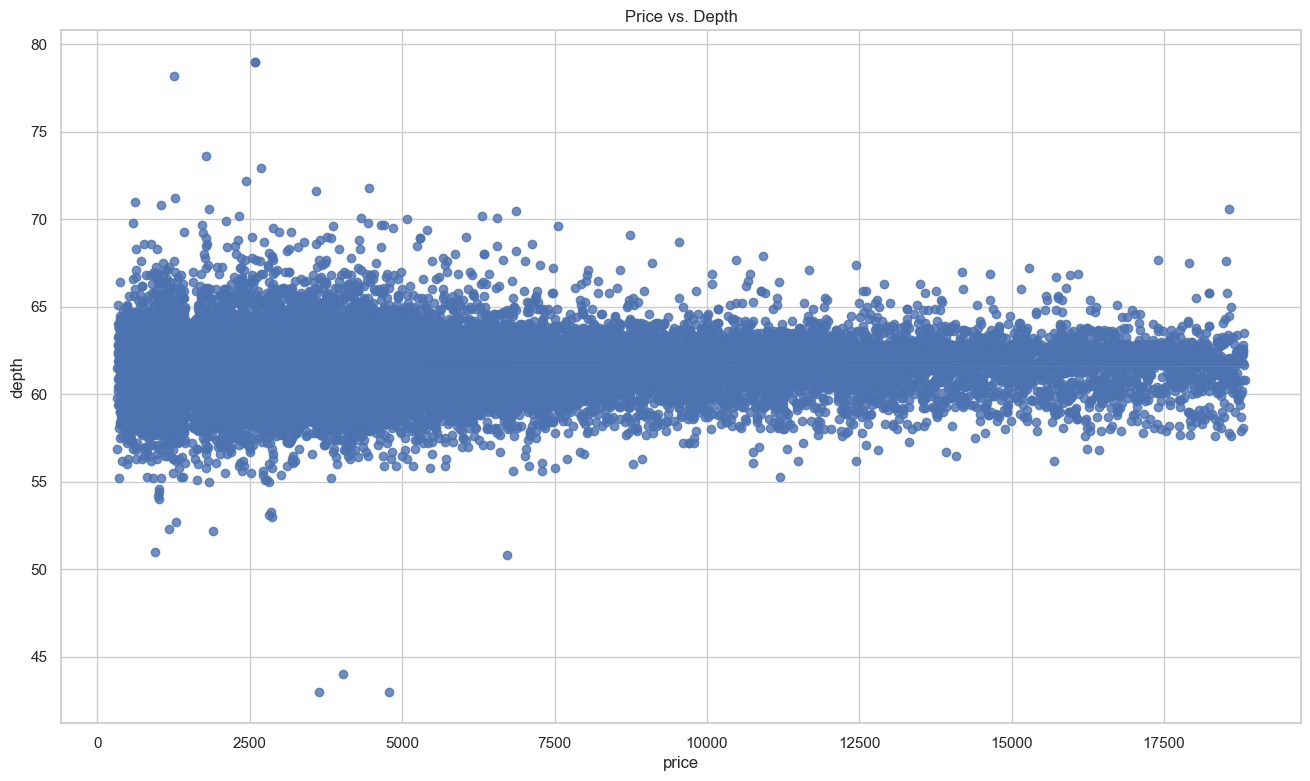

In [14]:
sns.regplot(x="price", y="depth", data=df)
plt.title("Price vs. Depth")

Text(0.5, 1.0, 'Price vs. Table')

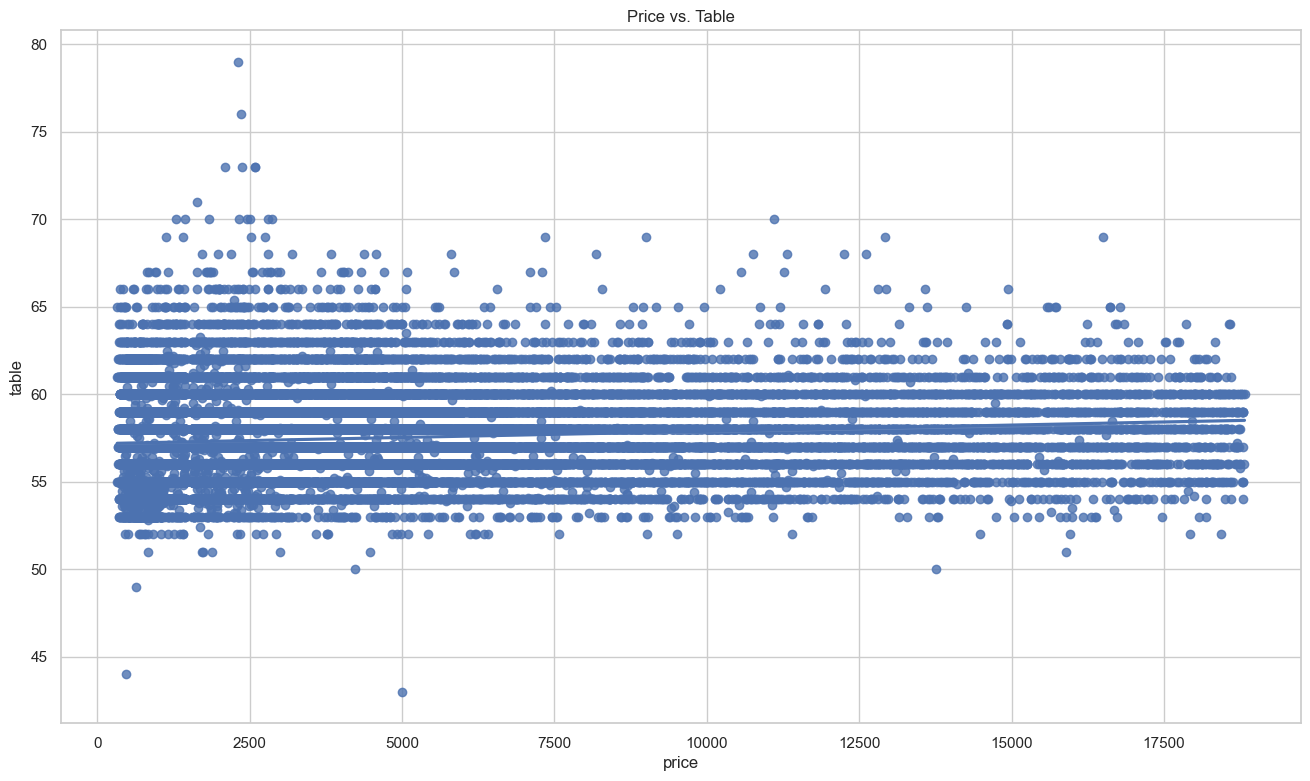

In [15]:
sns.regplot(x="price", y="table", data=df)
plt.title("Price vs. Table")

In [16]:
df = df[(df["depth"]<75)&(df["depth"]>45)]

df = df[(df["table"]<75)&(df["table"]>45)]

df = df[(df["y"]<30)]

df = df[(df["z"]<30)&(df["z"]>2)]

df.shape


(40424, 10)

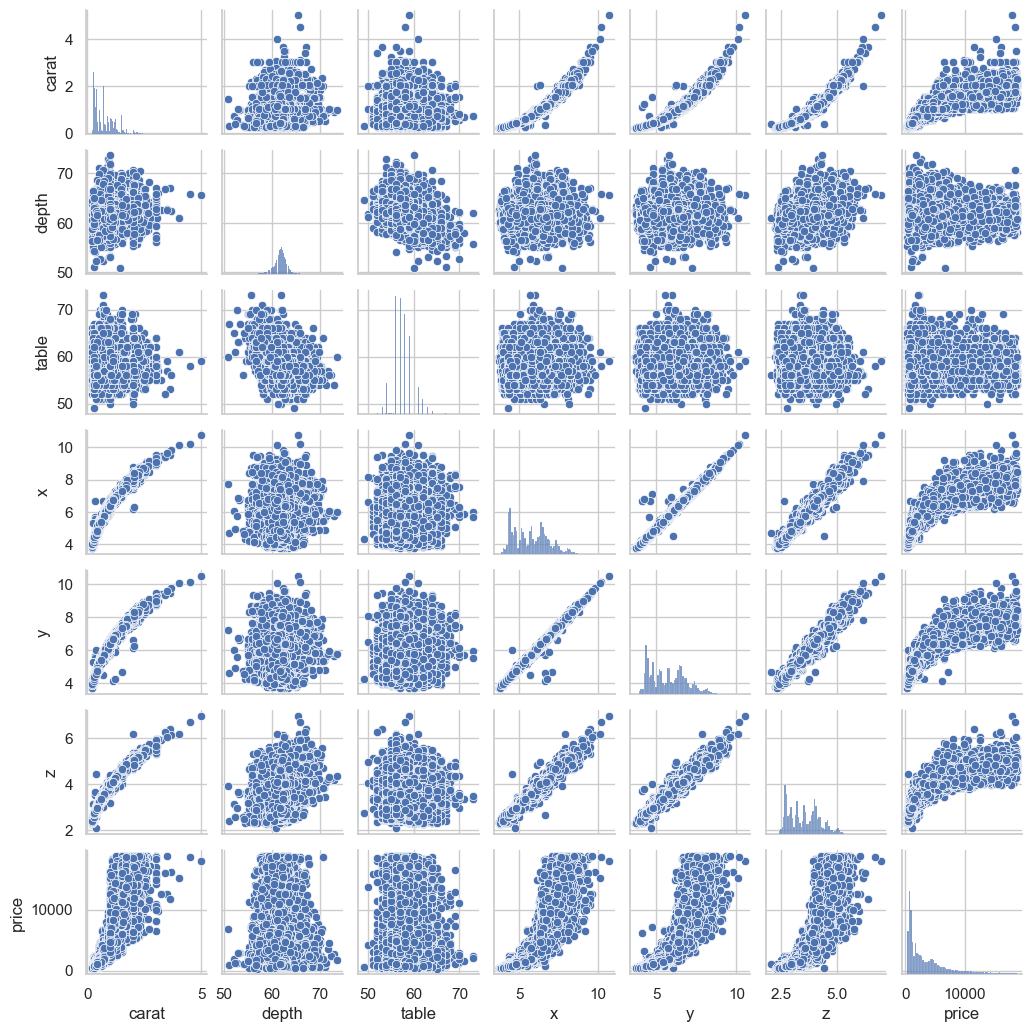

In [17]:
sns.pairplot(df, height=1.5)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40424 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40424 non-null  float64
 1   cut      40424 non-null  object 
 2   color    40424 non-null  object 
 3   clarity  40424 non-null  object 
 4   depth    40424 non-null  float64
 5   table    40424 non-null  float64
 6   x        40424 non-null  float64
 7   y        40424 non-null  float64
 8   z        40424 non-null  float64
 9   price    40424 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


Text(0.5, 1.0, 'Cut vs. Price')

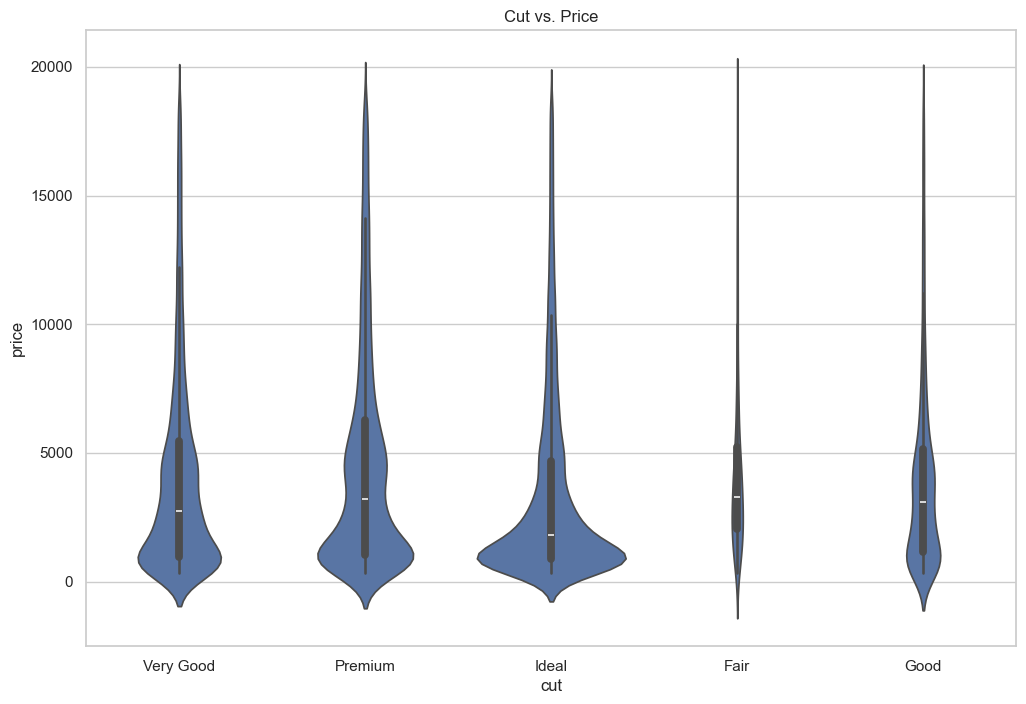

In [19]:
plt.figure(figsize=(12, 8))
sns.violinplot(x="cut", y="price", data=df, density_norm="count")
plt.title("Cut vs. Price")


Text(0.5, 1.0, 'Cut vs. Price')

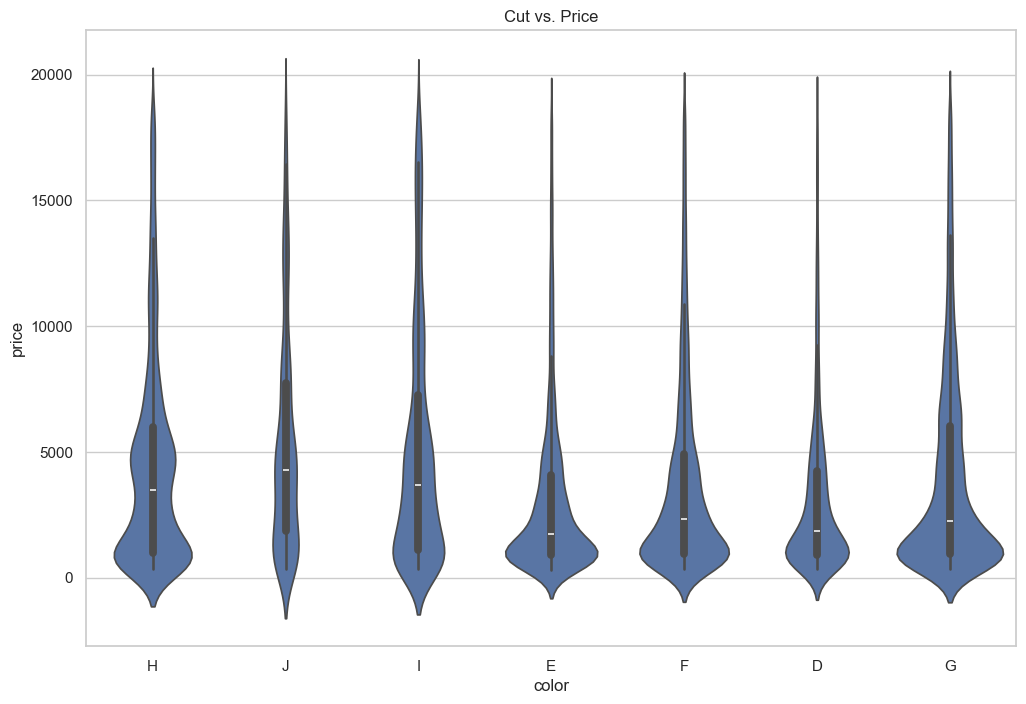

In [20]:
plt.figure(figsize=(12, 8))
sns.violinplot(x="color", y="price", data=df, density_norm="count")
plt.title("Cut vs. Price")

Text(0.5, 1.0, 'Cut vs. Price')

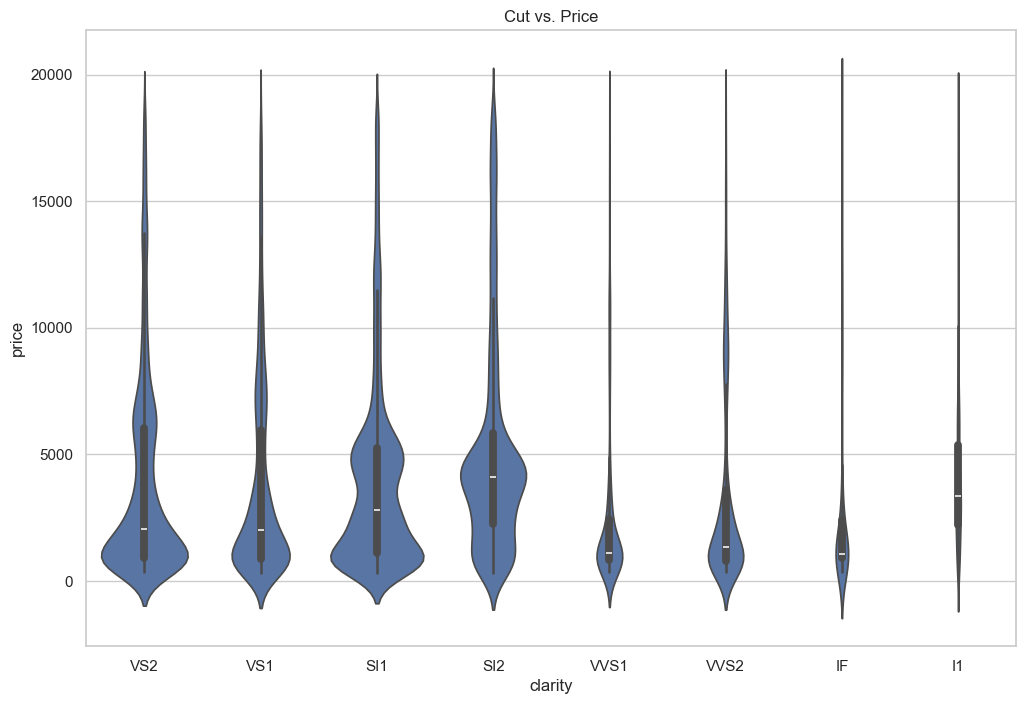

In [21]:
plt.figure(figsize=(12, 8))
sns.violinplot(x="clarity", y="price", data=df, density_norm="count")
plt.title("Cut vs. Price")

In [22]:
df["cut"].value_counts()

cut
Ideal        16153
Premium      10367
Very Good     9018
Good          3688
Fair          1198
Name: count, dtype: int64

In [23]:
df["color"].value_counts()

color
G    8493
E    7345
F    7138
H    6198
D    5066
I    4114
J    2070
Name: count, dtype: int64

In [24]:
df["clarity"].value_counts()

clarity
SI1     9847
VS2     9153
SI2     6947
VS1     6132
VVS2    3737
VVS1    2719
IF      1330
I1       559
Name: count, dtype: int64

In [25]:
categorical_cols = df.select_dtypes(include=['object']).columns

df_copy = df.copy()

label_encoder = LabelEncoder()

for col in categorical_cols:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

df_copy.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.90,4,4,5,62.6,57.0,6.11,6.09,3.82,4662
1,0.33,3,4,4,61.9,58.0,4.45,4.43,2.75,743
2,1.20,2,4,4,61.1,58.0,6.84,6.88,4.19,8039
3,1.64,4,6,2,62.6,59.0,7.45,7.51,4.68,7739
4,1.51,4,5,3,60.6,60.2,7.32,7.37,4.45,7441


In [26]:
df.describe()

,carat,depth,table,x,y,z,price
count,40424.000000,40424.000000,40424.000000,40424.000000,40424.000000,40424.000000,40424.000000
mean,0.800273,61.749681,57.455779,5.737395,5.739168,3.543067,3950.329309
std,0.475270,1.420194,2.220422,1.121490,1.113602,0.692545,4000.406260
min,0.200000,50.800000,49.000000,3.730000,3.680000,2.060000,326.000000
25%,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000,955.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2415.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5351.000000
max,5.010000,73.600000,73.000000,10.740000,10.540000,6.980000,18823.000000


Text(0.5, 1.0, 'Correlation Heatmap')

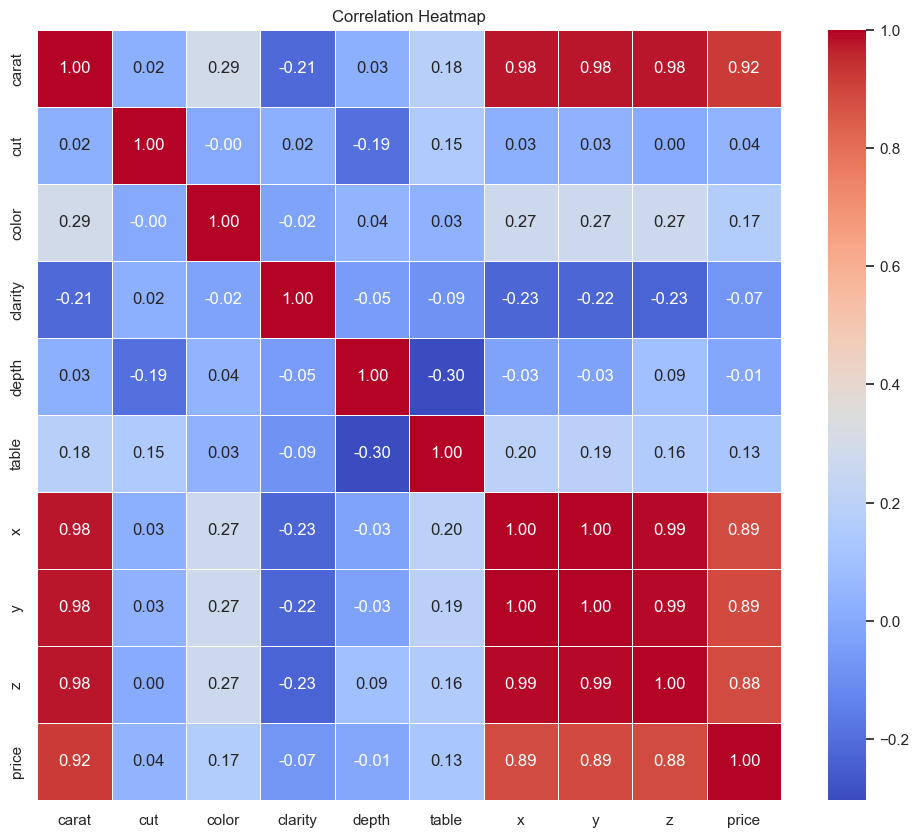

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_copy.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")


In [28]:
X = df_copy.drop("price", axis=1)
y = df_copy["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df_copy.drop('price', axis=1)
y = df_copy['price']

linear_regression_pipeline = Pipeline([
    ('linear_regression', LinearRegression())
])

decision_tree_pipeline = Pipeline([
    ('decision_tree', DecisionTreeRegressor())
])

random_forest_pipeline = Pipeline([
    ('random_forest', RandomForestRegressor())
])

kneighbors_pipeline = Pipeline([
    ('kneighbors', KNeighborsRegressor())
])

xgb_pipeline = Pipeline([
    ('xgboost', XGBRegressor())
])

pipelines = [
    ('Linear Regression', linear_regression_pipeline),
    ('Decision Tree', decision_tree_pipeline),
    ('Random Forest', random_forest_pipeline),
    ('KNeighbors', kneighbors_pipeline),
    ('XGBoost', xgb_pipeline)
]


for name, pipeline in pipelines:
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  

    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{name} Metrics:")
    print(f"R^2: {r2}")
    print(f"Adjusted R^2: {adjusted_r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print("-" * 20)



Linear Regression Metrics:
R^2: 0.8874746941274013
Adjusted R^2: 0.8873492789258096
MAE: 857.4537803088181
MSE: 1791819.048219306
RMSE: 1338.588453640366
--------------------
Decision Tree Metrics:
R^2: 0.9654807640961295
Adjusted R^2: 0.9654422906443481
MAE: 367.24625850340135
MSE: 539529.0560915276
RMSE: 734.5264161972173
--------------------
Random Forest Metrics:
R^2: 0.9799302122173328
Adjusted R^2: 0.9799078434136121
MAE: 278.0586547015343
MSE: 313761.98298799235
RMSE: 560.1446089966344
--------------------
KNeighbors Metrics:
R^2: 0.9426410596634787
Adjusted R^2: 0.942577130194373
MAE: 516.7246258503402
MSE: 944918.9347334569
RMSE: 972.0694083929691
--------------------
XGBoost Metrics:
R^2: 0.981640567913371
Adjusted R^2: 0.9816201053884447
MAE: 276.4255215882518
MSE: 289617.0586680501
RMSE: 538.160811159685
--------------------


In [61]:
pred = xgb_pipeline.predict(X_test)

rdmf = random_forest_pipeline.predict(X_test)

kngb = kneighbors_pipeline (X_test)

In [62]:
kneighbors_pipeline.fit(X, y)

joblib.dump(kneighbors_pipeline, 'kneighbors_pipeline.joblib')


['kneighbors_pipeline.joblib']

In [36]:
xgb_pipeline.fit(X, y)


joblib.dump(xgb_pipeline, 'xgb_model.joblib')

['xgb_model.joblib']

In [57]:
random_forest_pipeline.fit(X, y)


joblib.dump(random_forest_pipeline, "rdmf_model.joblib")

['rdmf_model.joblib']

In [94]:
def cleaning_diamonds(df):
    # Drop unnecessary columns and reset index
    df = df.drop(columns=["id"])
    df = df.reset_index(drop=True)

    # Filter data based on specified conditions
    df = df[(df["depth"] < 75) & (df["depth"] > 45)]
    df = df[(df["table"] < 75) & (df["table"] > 45)]
    df = df[(df["y"] < 30)]
    df = df[(df["z"] < 30) & (df["z"] > 2)]

    # Encode categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])

    # Separate features (X) and target variable (y)
    X = df.drop("price", axis=1)
    y = df["price"]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define pipelines
    linear_regression_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ])

    decision_tree_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', DecisionTreeRegressor())
    ])

    random_forest_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor())
    ])

    kneighbors_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsRegressor())
    ])

    xgb_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', XGBRegressor())
    ])

    # List of pipelines
    pipelines = [
        ('Linear Regression', linear_regression_pipeline),
        ('Decision Tree', decision_tree_pipeline),
        ('Random Forest', random_forest_pipeline),
        ('KNeighbors', kneighbors_pipeline),
        ('XGBoost', xgb_pipeline)
    ]

    # Train and evaluate each pipeline
    for name, pipeline in pipelines:
        # Fit the pipeline on the training data
        pipeline.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = pipeline.predict(X_test)

        # Evaluate the model (you can use a suitable metric, e.g., RMSE)
        r2 = r2_score(y_test, y_pred)
        adjusted_r2 = 1 - ((1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        print(f"{name} Metrics:")
        print(f"R^2: {r2}")
        print(f"Adjusted R^2: {adjusted_r2}")
        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print("-" * 20)



In [37]:
test = pd.read_csv(r"C:\Users\ateso\Desktop\Diamonds\Data\test.csv")

In [38]:
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.50,Ideal,G,VS1,61.3,53.9,7.37,7.42,4.53
1,1,1.26,Premium,E,SI2,62.9,59.0,6.85,6.82,4.30
2,2,0.39,Good,H,VS2,63.1,58.0,4.63,4.66,2.93
3,3,1.20,Very Good,I,SI1,61.2,62.0,6.75,6.84,4.16
4,4,0.31,Ideal,E,VS2,61.6,57.0,4.35,4.38,2.69


In [39]:
train = df_copy
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.90,4,4,5,62.6,57.0,6.11,6.09,3.82,4662
1,0.33,3,4,4,61.9,58.0,4.45,4.43,2.75,743
2,1.20,2,4,4,61.1,58.0,6.84,6.88,4.19,8039
3,1.64,4,6,2,62.6,59.0,7.45,7.51,4.68,7739
4,1.51,4,5,3,60.6,60.2,7.32,7.37,4.45,7441


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.0+ MB


In [41]:
test.shape

(13485, 10)

In [42]:
test.describe()

,id,carat,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.790154,61.748343,57.458465,5.714213,5.720485,3.527993
std,3892.928525,0.469665,1.418684,2.246779,1.114752,1.195786,0.691770
min,0.000000,0.200000,53.200000,49.000000,0.000000,3.780000,0.000000
25%,3371.000000,0.400000,61.000000,56.000000,4.700000,4.710000,2.900000
50%,6742.000000,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000
75%,10113.000000,1.040000,62.500000,59.000000,6.530000,6.520000,4.030000
max,13484.000000,4.130000,71.600000,95.000000,10.020000,58.900000,8.060000


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.0+ MB


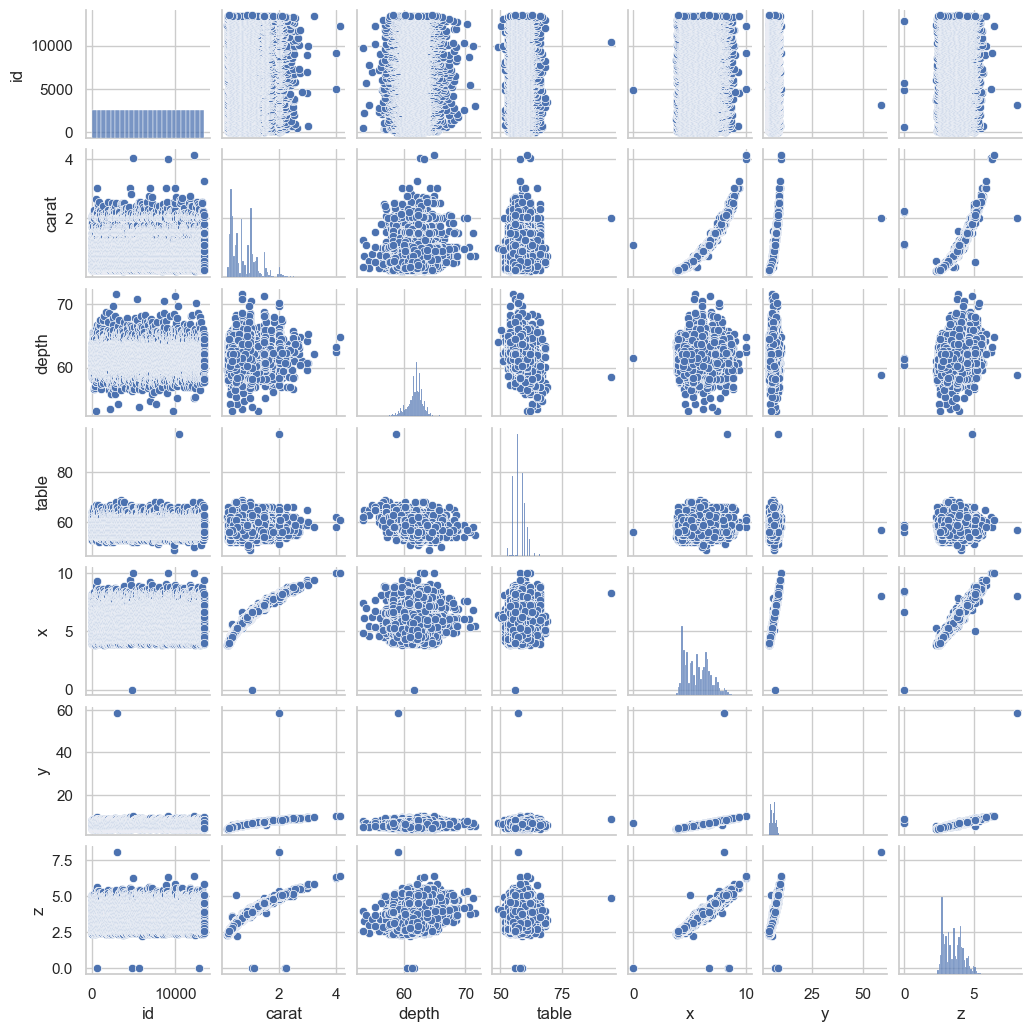

In [44]:
sns.pairplot(test, height=1.5)
plt.show()

Text(0.5, 1.0, 'carat vs. Y')

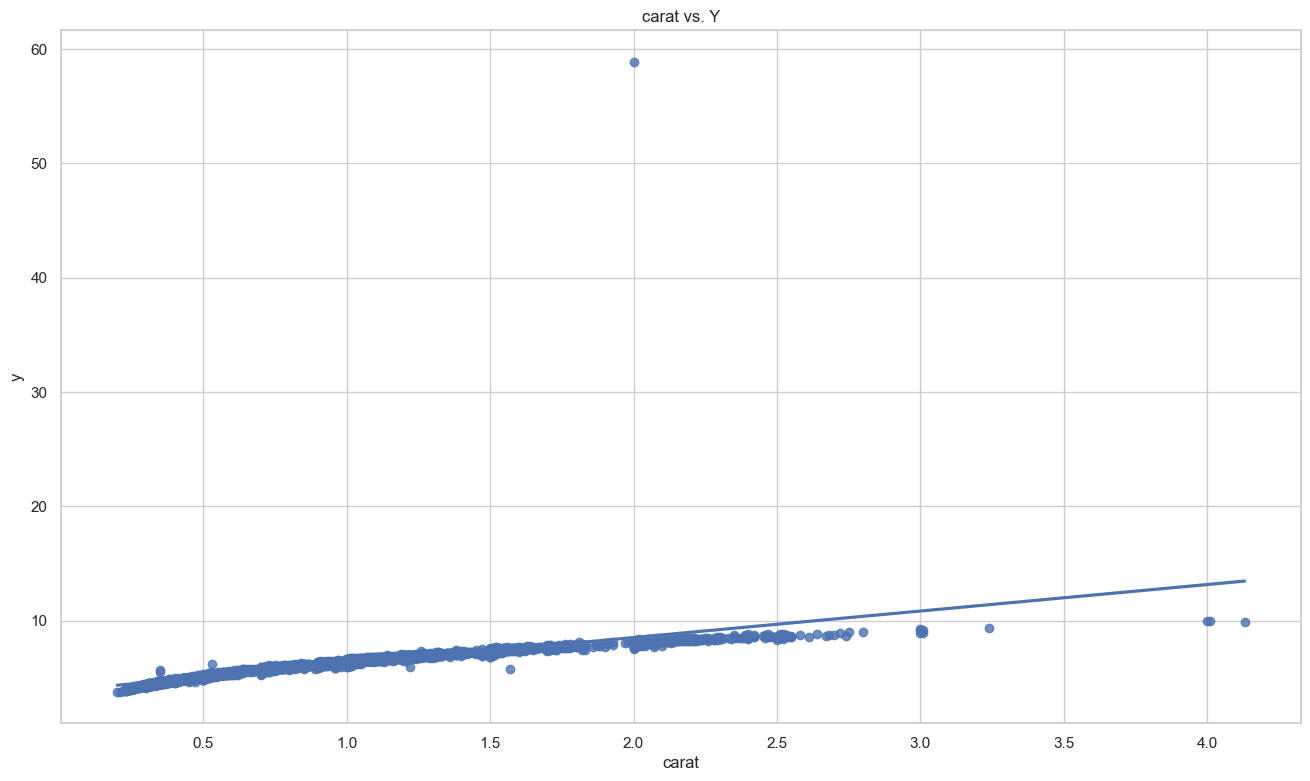

In [222]:
sns.regplot(x="carat", y="y", data=test)
plt.title("carat vs. Y")

Text(0.5, 1.0, 'carat vs. Z')

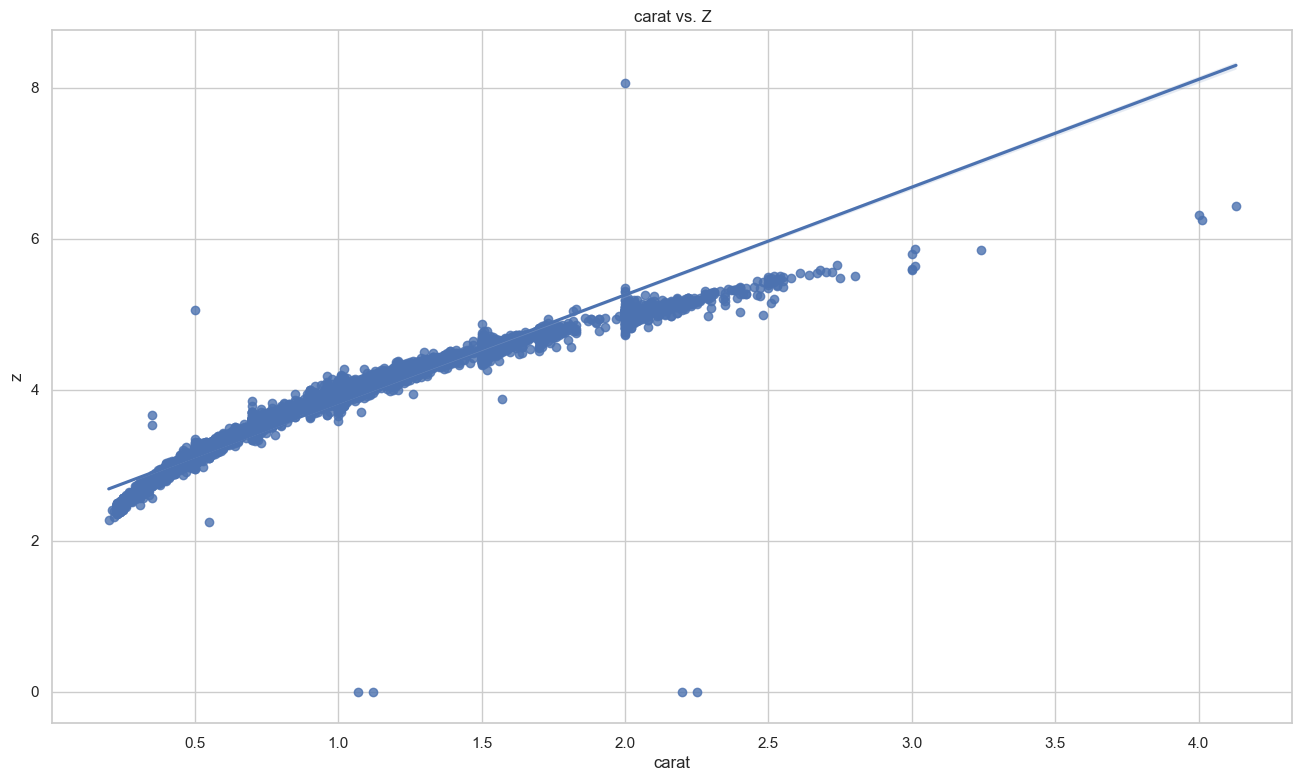

In [223]:
sns.regplot(x="carat", y="z", data=test)
plt.title("carat vs. Z")

Text(0.5, 1.0, 'carat vs. X')

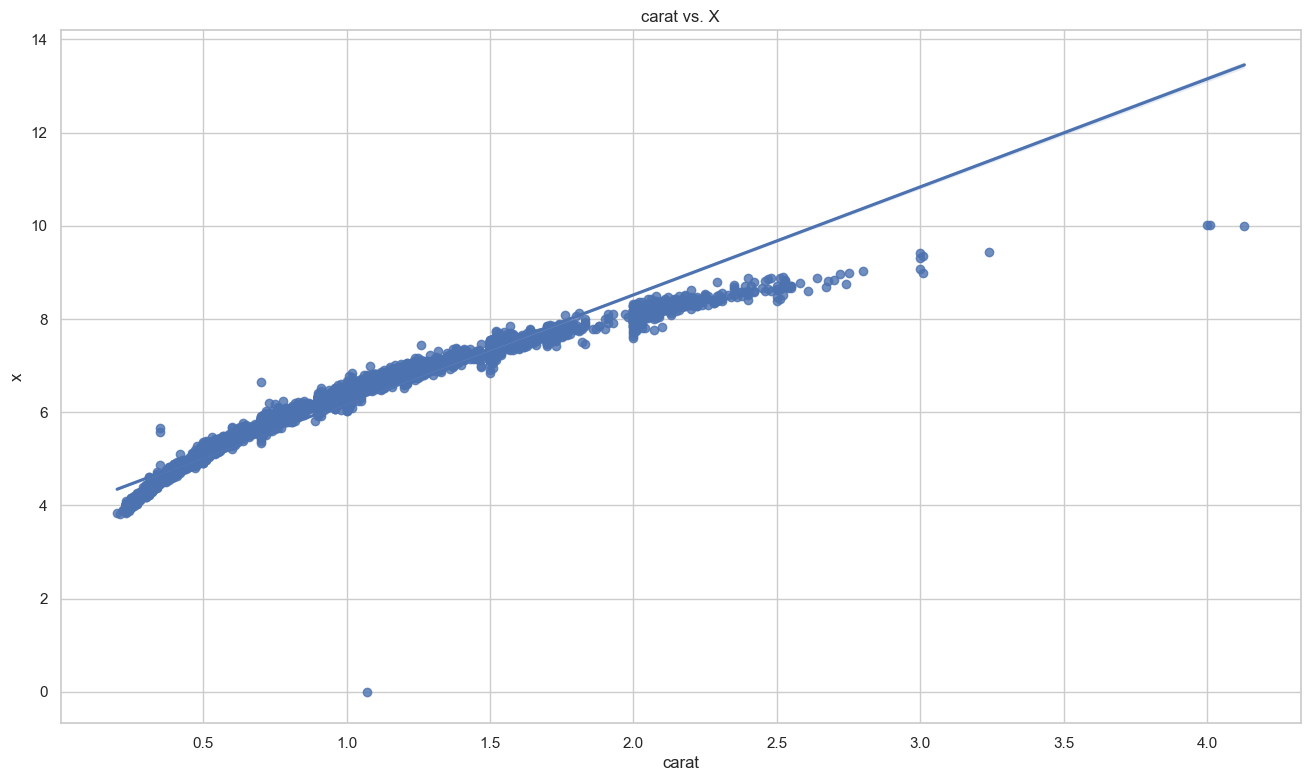

In [224]:
sns.regplot(x="carat", y="x", data=test)
plt.title("carat vs. X")

In [45]:
test_copy = test.copy()

categorical_cols = test_copy.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    test_copy[col] = label_encoder.fit_transform(test_copy[col])

test_copy.head()


,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.50,2,3,4,61.3,53.9,7.37,7.42,4.53
1,1,1.26,3,1,3,62.9,59.0,6.85,6.82,4.30
2,2,0.39,1,4,5,63.1,58.0,4.63,4.66,2.93
3,3,1.20,4,5,2,61.2,62.0,6.75,6.84,4.16
4,4,0.31,2,1,5,61.6,57.0,4.35,4.38,2.69


In [46]:
test.shape

(13485, 10)

In [47]:
test_copy = test_copy.drop(columns=["id"])
test_copy = test_copy.reset_index(drop=True)

In [48]:
test_copy.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.50,2,3,4,61.3,53.9,7.37,7.42,4.53
1,1.26,3,1,3,62.9,59.0,6.85,6.82,4.30
2,0.39,1,4,5,63.1,58.0,4.63,4.66,2.93
3,1.20,4,5,2,61.2,62.0,6.75,6.84,4.16
4,0.31,2,1,5,61.6,57.0,4.35,4.38,2.69


Text(0.5, 1.0, 'Correlation Heatmap')

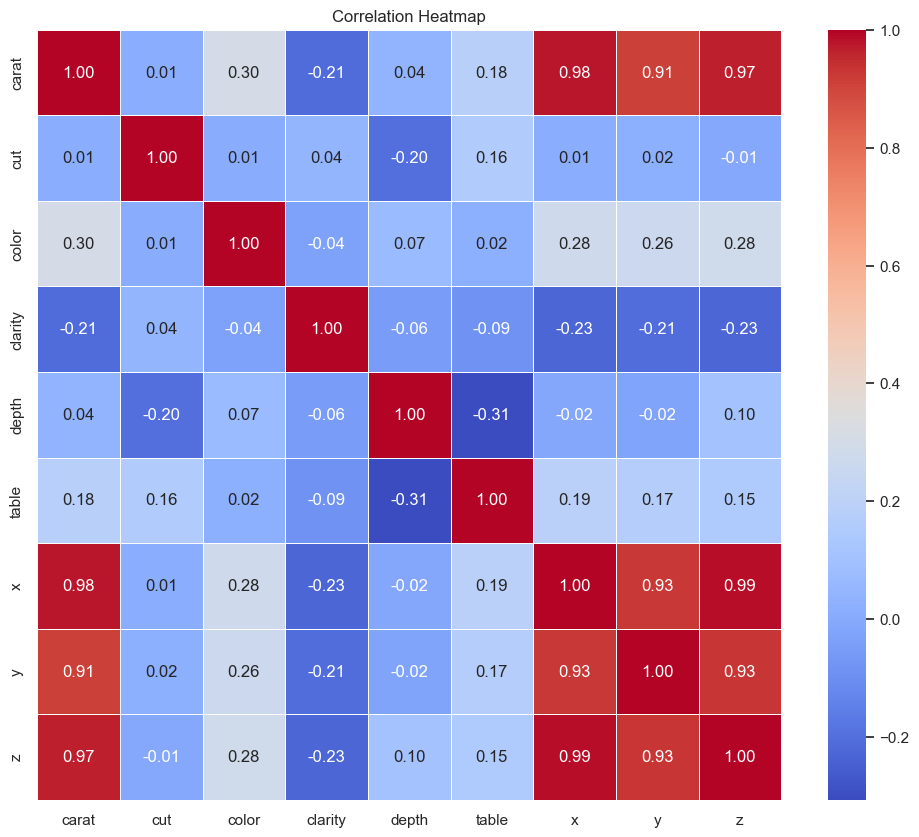

In [229]:
plt.figure(figsize=(12, 10))
sns.heatmap(test_copy.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")

In [49]:
def clean_data(test_copy):
    
    # Encode categorical columns
    categorical_cols = test_copy.select_dtypes(include=['object']).columns
    label_encoder = LabelEncoder()
    
    for col in categorical_cols:
        test_copy[col] = label_encoder.fit_transform(test_copy[col])

    return test_copy

test_copy = clean_data(test_copy)


    

In [63]:
import joblib

loaded_model = joblib.load(r"C:\Users\ateso\Desktop\Diamonds\Trained Models\kneighbors_pipeline.joblib")


predictions = loaded_model.predict(test_copy)

submission_df = pd.DataFrame({'id': test_copy.index, 'price': predictions})

submission_df.to_csv(r"C:\Users\ateso\Desktop\Diamonds\Results\kneighbors_pipeline_model.csv", index=False)



In [53]:
test_copy.shape

(13485, 9)